<a href="https://colab.research.google.com/github/annettembeyu/Core-Project/blob/master/Week_Two_IP_Moringa_DSC_Annette_Mbeyu_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

>To  predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success

The objectives for this analysis will have been met when:

*   the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda will be known evident from the data.
*   provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.


### c) Understanding the context 


The main obstacles to economic and human development in Africa is Financial Inclusion; across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
 Access to bank accounts is regarded as an indicator of financial inclusion. Despite increase in mobile money services in Africa and the growth of innovative fintech solutions,the banks are still paramount in accessing financial services. 
 Saving, payment facilitation, builiding of credit worthiess of businesses and improved access to financial services are only possible in the banks.Therefore, access to bank accounts is instrumental in the long-term growth of the economy.
 
 
 **It is of interest for me as a data scientist to assertain the status of financial inclusion in Kenya, Rwanda,Tanzania and Uganda as well as getting an understanding of the demographic factors that affect the financial outcomes of individuals**


### d) Recording the Experimental Design



1.   Loading the data
2.   Checking the data for:

        *  Number of records in the dataset
        *  Preview top records in the dataset
        *  Preview the bottom records in the dataset
        *  Appropriateness of the datatype of the variables in each columns
3.   External Data Source Validation
        * Valiation
4.   Tidying the Dataset:
        * Finding out how many outliers are in the data
        * Checking out for outliers 
        * Remove outliers
        * Identifying missing values
        * Check for anomalies
        * Deal with missing data
        * More data cleaning procedure
5.   Exploratory Analysis
        * Ploting the univariate summaries and recording our observations
6.   Implement the solution
7.   Challenging the solution
8.   Follow questions









### e) Data Relevance

## 2. Reading the Data

In [1]:
# Loading the Data from the source 
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
#Financial Dataset - 1.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
finance_df = pd.read_csv('http://bit.ly/FinancialDataset')
finance_df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 3. Checking the Data

In [2]:
# Finding the no. of records in the dataset
#
print(finance_df.shape)

(23524, 13)


In [3]:
# Previewing the top of the dataset
#
finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Previewing the bottom of the dataset
# 
finance_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
# Checking whether each column has an appropriate datatype
#
print(finance_df.nunique())
finance_df.info()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float6

In [6]:
# printing out the particuar unique values in each of the columns in the data
for x in finance_df.columns:
    print(x,finance_df[x].unique())
    print('--------------------------------------------------------------------------------')

country ['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
--------------------------------------------------------------------------------
year [2018 2029 2056 2016 2039 2017]
--------------------------------------------------------------------------------
uniqueid ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
--------------------------------------------------------------------------------
Has a Bank account ['Yes' 'No' nan]
--------------------------------------------------------------------------------
Type of Location ['Rural' 'Urban' nan]
--------------------------------------------------------------------------------
Cell Phone Access ['Yes' 'No' nan]
--------------------------------------------------------------------------------
household_size [ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
--------------------------------------------------------------------------------
Respondent Age [ 24.  70. 

In [7]:
#Checking whether there are any null values
finance_df.isnull().values.any()

True

In [8]:
# checking the number of null values in the atribuutes
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [9]:
fin_df = finance_df.rename(columns={'year': 'survey_year', 'uniqueid ': 'unique_id', 'Has a Bank account':'own_a_bank_account', 'Type of Location': 'type_loc', 'Cell Phone Access': 'phone_access', 'Respondent Age': 'respondent_age', 'The relathip with head': 'relationship_with_head', 'Level of Educuation': 'educ_level', 'Type of Job': 'job_type'  })

In [10]:
# printing the dataframe with the renmaed columns

fin_df

,country,survey_year,uniqueid,own_a_bank_account,type_loc,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,educ_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [11]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   survey_year             23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   own_a_bank_account      23488 non-null  object 
 4   type_loc                23509 non-null  object 
 5   phone_access            23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   respondent_age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   relationship_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  educ_level              23495 non-null  object 
 12  job_type                23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link]( http://bit.ly/FinancialDataset).

### a.Validation

## 5. Tidying the Dataset

In [12]:
#finding how many outliers are there in the dataset
#there are two numeric variable; respondent age and household size


Q1= fin_df.household_size.quantile(0.25)
Q3= fin_df.household_size.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#(fin_df.household_siz < (Q1 - 1.5 * IQR)) |(fin_df.household > (Q3 + 1.5 * IQR))


((fin_df.household_size < (Q1 - 1.5 * IQR)) | (fin_df.household_size > (Q3 + 1.5 * IQR))).sum()

3.0


377

In [13]:
# for the respondent age
Q1= fin_df.respondent_age.quantile(0.25)
Q3= fin_df.respondent_age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#(finance_df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


((fin_df.respondent_age < (Q1 - 1.5 * IQR)) | (fin_df.respondent_age > (Q3 + 1.5 * IQR))).sum()

23.0


241

In [14]:
# Checking for Outliers
#
outliers=[]

def detect_outlier(fin_df):
    
    threshold=3
    mean_1 = np.mean(fin_df)
    std_1 =np.std(fin_df)
    
    for y in fin_df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(fin_df['respondent_age'])


[95.0,
 95.0,
 95.0,
 93.0,
 90.0,
 89.0,
 95.0,
 94.0,
 95.0,
 93.0,
 90.0,
 92.0,
 92.0,
 90.0,
 90.0,
 90.0,
 91.0,
 93.0,
 95.0,
 90.0,
 89.0,
 89.0,
 95.0,
 90.0,
 89.0,
 89.0,
 89.0,
 90.0,
 95.0,
 93.0,
 92.0,
 95.0,
 94.0,
 92.0,
 95.0,
 90.0,
 95.0,
 95.0,
 89.0,
 95.0,
 98.0,
 95.0,
 97.0,
 92.0,
 89.0,
 92.0,
 89.0,
 96.0,
 89.0,
 99.0,
 89.0,
 94.0,
 91.0,
 91.0,
 90.0,
 89.0,
 89.0,
 90.0,
 95.0,
 89.0,
 90.0,
 96.0,
 100.0,
 90.0,
 90.0,
 89.0,
 98.0,
 91.0,
 92.0,
 95.0,
 89.0,
 94.0,
 99.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 100.0,
 95.0,
 91.0,
 90.0,
 95.0,
 94.0,
 90.0,
 98.0,
 98.0,
 100.0,
 100.0,
 90.0,
 90.0,
 100.0,
 90.0,
 90.0,
 96.0,
 90.0,
 90.0,
 98.0,
 95.0,
 98.0,
 90.0]

In [15]:
# Checking for Outliers
#
outliers=[]

def detect_outlier(fin_df):
    
    threshold=3
    mean_1 = np.mean(fin_df)
    std_1 =np.std(fin_df)
    
    for y in fin_df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(fin_df['household_size'])


[11.0,
 12.0,
 16.0,
 11.0,
 12.0,
 11.0,
 11.0,
 16.0,
 11.0,
 11.0,
 15.0,
 13.0,
 11.0,
 11.0,
 11.0,
 13.0,
 12.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 13.0,
 13.0,
 12.0,
 12.0,
 12.0,
 11.0,
 12.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 13.0,
 11.0,
 11.0,
 11.0,
 11.0,
 14.0,
 21.0,
 11.0,
 14.0,
 12.0,
 15.0,
 11.0,
 15.0,
 15.0,
 13.0,
 11.0,
 11.0,
 13.0,
 12.0,
 13.0,
 11.0,
 11.0,
 11.0,
 13.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 13.0,
 14.0,
 12.0,
 12.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 11.0,
 15.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 13.0,
 11.0,
 11.0,
 12.0,
 12.0,
 18.0,
 12.0,
 12.0,
 12.0,
 14.0,
 12.0,
 17.0,
 11.0,
 12.0,
 12.0,
 13.0,
 13.0,
 12.0,
 12.0,
 13.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 20.0,
 12.0,
 14.0,
 15.0,
 12.0,
 12.0,
 15.0,
 11.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,

In [16]:
#Removing outliers
#fin_out = fin_df[~((fin_df < (Q1 - 1.5 * IQR)) | (fin_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#fin_out.shape


#for this case we will not remove the outliers as they are important in knowing the financial inclusion.

<function matplotlib.pyplot.show>

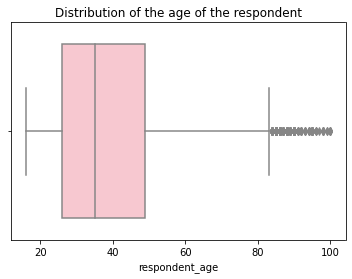

In [16]:
# visual viewing of the outliers in the age of respondent 
sns.boxplot(fin_df['respondent_age'], color ='pink')
plt.title('Distribution of the age of the respondent')
plt.show

<function matplotlib.pyplot.show>

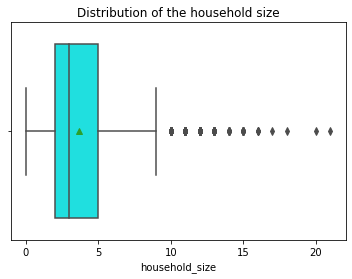

In [17]:
# visual viewing of the outliers in household size 
sns.boxplot(fin_df['household_size'], color = 'cyan', linewidth=1.5, showmeans=True)
plt.title('Distribution of the household size')
plt.show


In [18]:
# Identifying the Missing Data
#
fin_df.isnull().sum().sort_values(ascending= False)

own_a_bank_account        36
gender_of_respondent      34
respondent_age            34
marital_status            32
job_type                  30
educ_level                29
household_size            28
type_loc                  15
country                   14
phone_access              11
relationship_with_head     4
uniqueid                   0
survey_year                0
dtype: int64

In [19]:
# Checking for Anomalies
#
# for the respondent age
print(fin_df.respondent_age.skew())


0.8418012375387167


In [20]:
print(fin_df.household_size.skew())

0.977652354434429


In [21]:
# Dealing with the Missing Data
#
fin_inclusion = fin_df.dropna()

In [22]:
#  ensuring that the data has no missing values
fin_inclusion.isnull().sum()

country                   0
survey_year               0
uniqueid                  0
own_a_bank_account        0
type_loc                  0
phone_access              0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
educ_level                0
job_type                  0
dtype: int64

In [23]:
# having  aprevoew on the data.
fin_inclusion

,country,survey_year,uniqueid,own_a_bank_account,type_loc,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,educ_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 6. Exploratory Analysis

**Univariate analysis**

Text(0.5, 1.0, 'Counts of bank account holders')

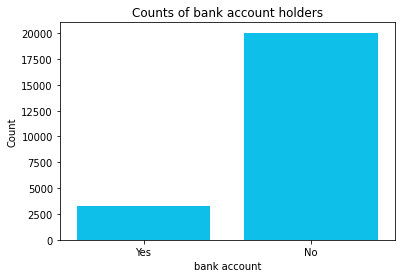

In [24]:
# Ploting the univariate summaries and recording our observations
# looking into the proportion of respondents having bank account irrespective of the country

sns.countplot(fin_inclusion.own_a_bank_account,color='#0EBFE9', saturation=1)
plt.xlabel('bank account')
plt.ylabel('Count')
plt.title('Counts of bank account holders')

<function matplotlib.pyplot.show>

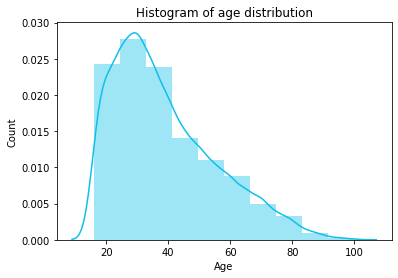

In [25]:
# Ploting the univariate summaries and recording our observations
#
sns.distplot(fin_inclusion.respondent_age, kde=True,bins=10, color='#0EBFE9')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of age distribution')
plt.show

In [26]:
# finding the average age of the respondent
fin_inclusion.respondent_age.mean()

38.80550914621085

In [27]:
# finding the respondent age that appeared most(mode)
fin_inclusion.respondent_age.mode()

0    30.0
dtype: float64

In [28]:
# finding the median
fin_inclusion.respondent_age.median()

35.0

In [29]:
# finding the skewness of the age of the respondent
fin_inclusion.respondent_age.skew()

0.840661747532081

In [30]:
# finding the kurtosis
fin_inclusion.respondent_age.kurt()

0.09844652254807196

In [31]:
fin_inclusion.respondent_age.describe().T

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

Text(0.5, 1.0, 'Distribution of household size')

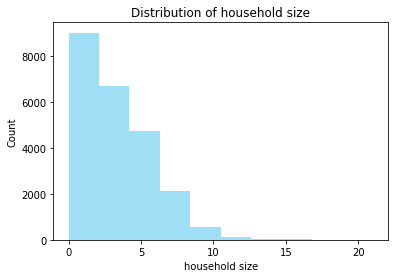

In [32]:
# the distribution of the household size in the data
sns.distplot(fin_inclusion.household_size,bins = 10, kde= False, color='#0EAFE9')
plt.xlabel('household size')
plt.ylabel('Count')
plt.title('Distribution of household size')

<function matplotlib.pyplot.show>

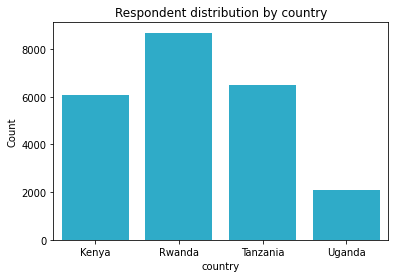

In [33]:
# checking the distribution of the respondents by country
sns.countplot(fin_inclusion.country, color='#0EBFE9',saturation=0.7 )
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Respondent distribution by country')
plt.show


<function matplotlib.pyplot.show>

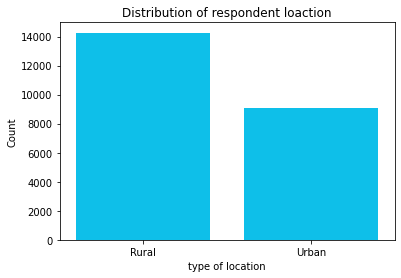

In [34]:
# to show the proportion of respondents location irrespective of the country
sns.countplot(fin_inclusion.type_loc, color='#0EBFE9',saturation=1 )
plt.xlabel('type of location')
plt.ylabel('Count')
plt.title('Distribution of respondent loaction')
plt.show

<function matplotlib.pyplot.show>

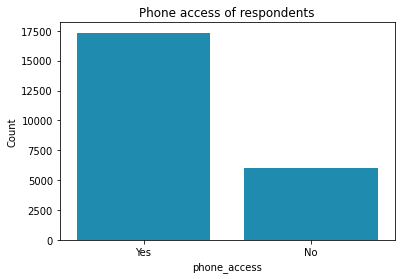

In [35]:
# to show the proportion of phone access

sns.countplot(fin_inclusion.phone_access, color='#009ACD',saturation=0.7 )
plt.xlabel('phone_access')
plt.ylabel('Count')
plt.title('Phone access of respondents')
plt.show

In [36]:
# getting the counts for the marital status respondents
fin_inclusion['marital_status'].value_counts()

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

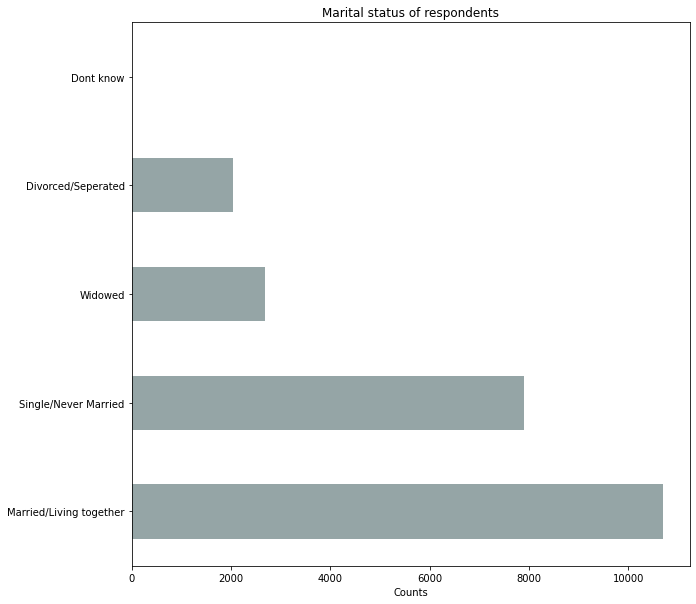

In [37]:
# the distribution of the respondents job types 
fin_inclusion['marital_status'].value_counts().plot(kind='barh', color='#95a5a6', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Marital status of respondents')
plt.show()

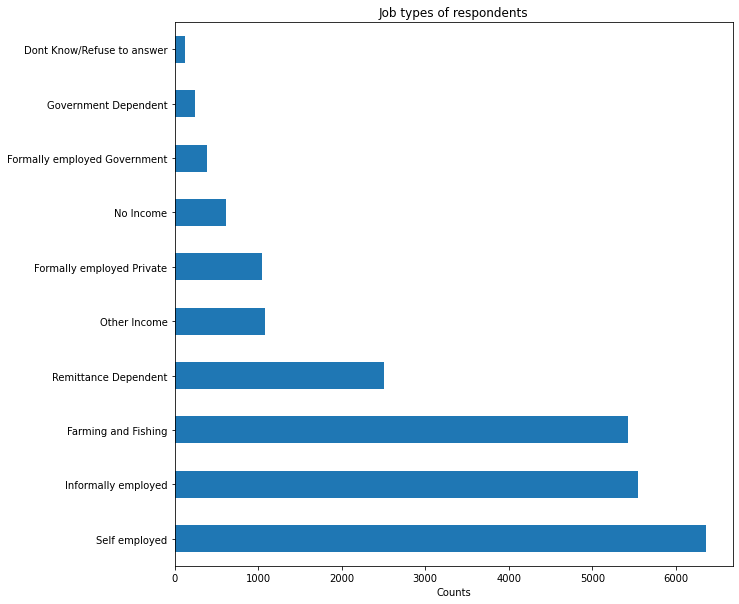

In [38]:
# the distribution of the respondents job types 
fin_inclusion['job_type'].value_counts().plot(kind='barh', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Job types of respondents')
plt.show()

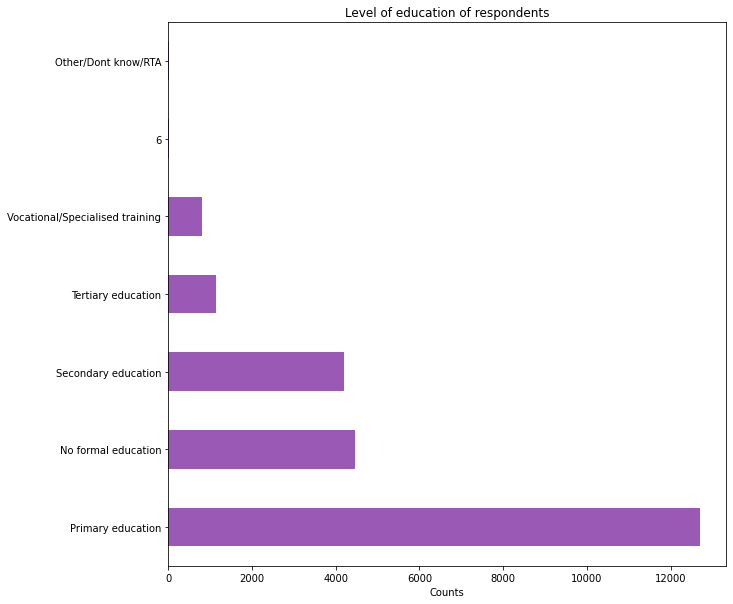

In [39]:
# the distribution of the level of education for the respondents
fin_inclusion['educ_level'].value_counts().plot(kind='barh', figsize=(10,10), color='#9b59b6')
plt.xlabel('Counts')
plt.title('Level of education of respondents')
plt.show()

**Bivariate anaysis**

Text(0.5, 1.0, 'Phone access of respondents')

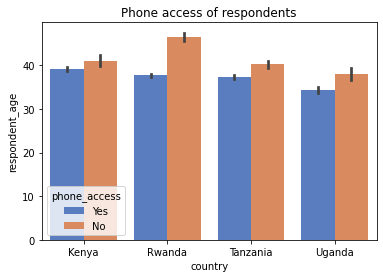

In [40]:
# the distribtion of respondents having phone access based on the country
sns.set_palette("muted")
sns.barplot (x='country', y='respondent_age', data=fin_inclusion, hue='phone_access')
plt.title('Phone access of respondents')

Text(0.5, 1.0, 'Status of ownership of bank account in each country')

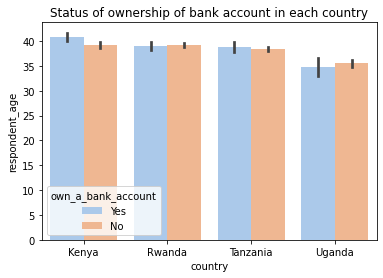

In [41]:
# bank account ownership in each country
sns.set_palette("pastel")
sns.barplot (x='country', y='respondent_age', data=fin_inclusion, hue='own_a_bank_account')
plt.title('Status of ownership of bank account in each country')

Text(0.5, 1.0, 'Location of the respondents')

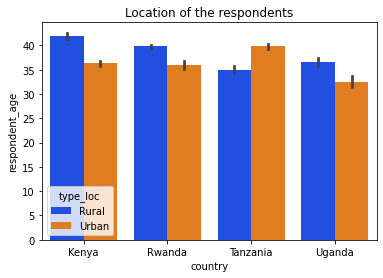

In [42]:
#location of the respondents in the different countries
sns.set_palette("bright")
sns.barplot (x='country', y='respondent_age', data=fin_inclusion, hue='type_loc')
plt.title('Location of the respondents')

Text(0.5, 1.0, 'type of location in each country')

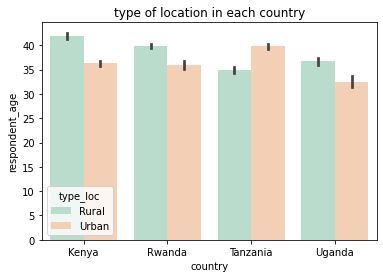

In [43]:
# location type in each country
sns.set_palette("Pastel2")
sns.barplot (x='country', y='respondent_age', data=fin_inclusion, hue='type_loc')
plt.title('type of location in each country')

Text(0.5, 1.0, 'Gender of respondents in each country')

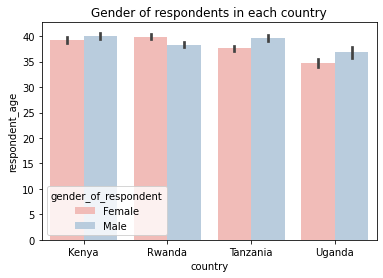

In [44]:
# gender of respondents in each country
sns.set_palette("Pastel1")
sns.barplot (x='country', y='respondent_age', data=fin_inclusion, hue='gender_of_respondent')
plt.title('Gender of respondents in each country')

Text(0.5, 1.0, 'Marital status of respondents in each country')

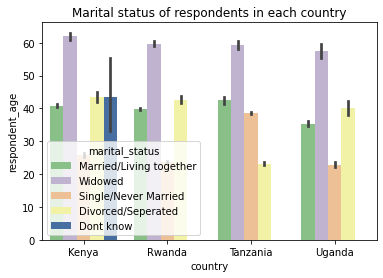

In [45]:
#maritalstatus in each country
sns.set_palette("Accent")
sns.barplot (x='country', y='respondent_age', data=fin_inclusion, hue='marital_status')
plt.title('Marital status of respondents in each country')

In [46]:
 # finding if there is any correlation between the respondent age and the household size
 coeff = fin_inclusion["respondent_age"].corr(fin_inclusion["household_size"])
 print(coeff)

-0.11970919507762415


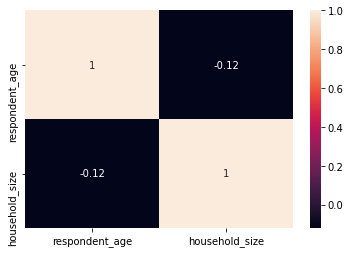

In [47]:
fin_num = fin_inclusion[['respondent_age', 'household_size']]
sns.heatmap(fin_num.corr(),annot=True)
plt.show()

**Multivariate analysis**

In [48]:
def bank_account(x):
    if x=="Yes":
        return 1
    else:
        return 0

def gender_num(x):
    if x=="Male":
        return 1
    else:
        return 0
    
def loc_num(x):
    if x=="Urban":
        return 1
    else:
        return 0
    
def phone_num(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [49]:
fin_inclusion['own_a_bank_account']=fin_inclusion['own_a_bank_account'].apply(lambda x:bank_account(x))
fin_inclusion['gender_of_respondent']=fin_inclusion['gender_of_respondent'].apply(lambda x:gender_num(x))
fin_inclusion['type_loc']=fin_inclusion['type_loc'].apply(lambda x:loc_num(x))
fin_inclusion['phone_access']=fin_inclusion['phone_access'].apply(lambda x:phone_num(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [50]:
# previewing the data
fin_inclusion

,country,survey_year,uniqueid,own_a_bank_account,type_loc,phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,educ_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4.0,48.0,0,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,0,1,2.0,27.0,0,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,0,1,5.0,27.0,0,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,1,1,7.0,30.0,0,Parent,Divorced/Seperated,Secondary education,Self employed


In [51]:
fin_inclusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   survey_year             23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   own_a_bank_account      23343 non-null  int64  
 4   type_loc                23343 non-null  int64  
 5   phone_access            23343 non-null  int64  
 6   household_size          23343 non-null  float64
 7   respondent_age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  int64  
 9   relationship_with_head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  educ_level              23343 non-null  object 
 12  job_type                23343 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 3.1+ MB


In [62]:
# drop unneccesary columns
to_drop = ['country','uniqueid','relationship_with_head', 'marital_status', 'educ_level', 'job_type']
fin_inclusion.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
# preprocessing the data to store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable


X = fin_inclusion.drop('own_a_bank_account', 1)
y =fin_inclusion['own_a_bank_account']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [67]:
explained_variance = pca.explained_variance_ratio_

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [71]:
#Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965
